
## **Don't overfit challenge**


### **Introduction**

The goal of this project is to build a model on a small dataset without overfitting, while achieving an AUC score greater than 0.8. Several algorithms will be attempted.



#### **Exploratory Data Analysis**





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import cross_val_score, KFold, cross_validate, RandomizedSearchCV, train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold

from sklearn.pipeline import Pipeline

from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

sns.set_palette("husl")

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [3]:
train= pd.read_csv('train.csv')
train_df= train.drop('id', axis= 1)
test = pd.read_csv('test.csv')
test_df= test.drop('id', axis= 1)

In [4]:
train_df.head(2)

,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,1.825,-0.912,-0.107,0.305,0.102,0.826,0.417,0.177,-0.673,-0.503,1.864,0.41,-1.927,0.102,-0.931,1.763,1.449,-1.097,-0.686,-0.25,-1.859,1.125,1.009,-2.296,0.385,-0.876,1.528,-0.144,-1.078,-0.403,0.005,1.405,-0.044,-0.458,0.579,2.929,0.833,0.761,0.737,0.669,0.717,-1.542,-1.847,-0.445,1.238,-0.840,-1.891,-1.531,-0.396,-0.927,2.072,0.946,-1.105,0.008,0.933,-1.410,-0.770,1.740,-1.504,-0.391,-1.551,-1.415,-0.974,0.796,-2.464,-1.424,1.230,0.219,0.130,-0.371,-0.930,1.851,1.292,-0.380,1.318,1.146,-0.399,2.227,0.447,0.87,1.420,-1.675,0.019,0.060,0.768,2.563,0.638,1.164,0.407,-1.556,-0.903,1.329,0.452,-0.704,2.218,-1.844,0.158,-1.649,-0.172,-1.167,-1.456,-0.778,0.098,-1.627,0.405,-0.082,-0.797,-0.303,0.710,-0.252,1.920,0.706,-0.915,0.267,-0.607,0.966,-0.337,-2.292,-1.366,-1.085,0.278,0.212,1.260,-1.276,-2.013,-1.101,0.797,0.661,1.232,-0.632,-0.805,1.236,-1.085,-0.067,-0.661,-0.745,1.306,-0.010,-0.475,-0.613,-0.841,-0.837,0.671,2.493,0.689,0.946,0.160,-0.607,-0.775,1.688,0.302,-1.156,-0.718,0.126,0.745,-0.287,-0.565,0.646,-0.119,-0.675,-0.479,-0.191,-0.454,1.314,0.740,0.999,1.242,-0.339,0.403,-1.243,1.365,0.030,-0.475,0.860,0.036,1.313,-0.219,1.078,1.880,-0.317,-0.443,1.876,-0.611,0.892,1.435,-0.226,0.311,0.139,-0.075,1.381,1.716,-2.017,-0.485,1.906,-0.119,0.609,-0.564,0.264,-0.604,-0.733,-2.352,-1.661,0.498,-0.841,0.907,-0.476,0.817,1.372,1.187,0.844,0.028,0.029,-0.808,0.253,1.005,1.413,-0.133,0.655,-0.921,0.231,-1.902,-0.005,-1.730,1.132,-0.194,0.039,1.489,-0.328,0.966,-0.057,-0.181,0.723,-0.313,-0.165,-0.803,0.074,-2.851,-1.021,-0.894,0.967,0.218,-0.692,-0.514,0.754,-1.892,0.203,2.174,-0.755,-1.053,-0.516,-1.109,-0.681,1.250,-0.565,-1.318,-0.923,0.075,-0.704,2.457,0.771,-0.460,0.569,-1.320,-1.516,-2.145,-1.120,0.156,0.820,-1.049,-1.125,0.484,0.617,1.253,1.248,0.504,-0.802,-0.896,-1.793,-0.284,-0.601,0.569,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,-0.291,2.907,1.085,2.144,1.540,0.584,1.133,1.098,-0.237,-0.498,0.283,-1.10,-0.417,1.382,-0.515,-1.519,0.619,-0.128,0.866,-0.54,1.238,-0.227,0.269,-0.390,-2.721,1.659,0.106,-0.121,1.719,0.411,-0.303,-0.307,0.380,0.503,-1.320,0.339,-1.102,-0.947,0.267,0.695,0.167,0.188,-1.082,-0.872,0.660,0.051,0.303,-0.553,-0.771,0.588,0.472,1.315,-0.467,-0.064,1.808,0.633,1.221,1.112,1.133,-0.543,-2.144,0.151,-0.813,1.966,-1.190,0.190,-0.473,0.002,1.195,-0.799,1.117,-0.759,-0.661,0.406,-0.846,-0.035,-1.634,-0.011,0.503,0.61,-1.822,-0.030,1.188,-0.006,-0.279,1.914,0.620,-1.495,1.787,-0.305,0.602,-1.208,0.893,0.379,1.396,0.581,-0.475,-0.056,-0.691,-0.783,-1.485,1.911,-2.400,-2.372,-0.178,1.550,-0.228,0.674,0.987,1.373,-0.373,0.629,0.229,-0.630,-0.175,0.548,0.074,-2.090,-0.625,-1.131,1.111,-0.100,0.574,-0.660,-1.113,0.802,-0.093,1.302,-0.395,0.745,-0.384,0.066,-0.756,0.495,-0.822,0.135,0.88

In [5]:
train_df.shape, test.shape

((250, 301), (19750, 301))

The train set has 302 variables and 250 observations, while the test set has 19750 observations with 301 variables This dataset is prone to overfitting because the training samples are lesser than the features 
The test size is much more than the train size. There are no variable names and this might limit feature engineering.

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Columns: 301 entries, target to 299
dtypes: float64(301)
memory usage: 588.0 KB


In [7]:
missing_values_train = train_df.isnull().sum().sum()
missing_values_test = test.isnull().sum().sum()
missing_values_train, missing_values_test

(0, 0)

All of the variables are numeric and contain no missing values.

##### **Target Variable**

In [8]:
train_df.target. value_counts()

1.0    160
0.0     90
Name: target, dtype: int64

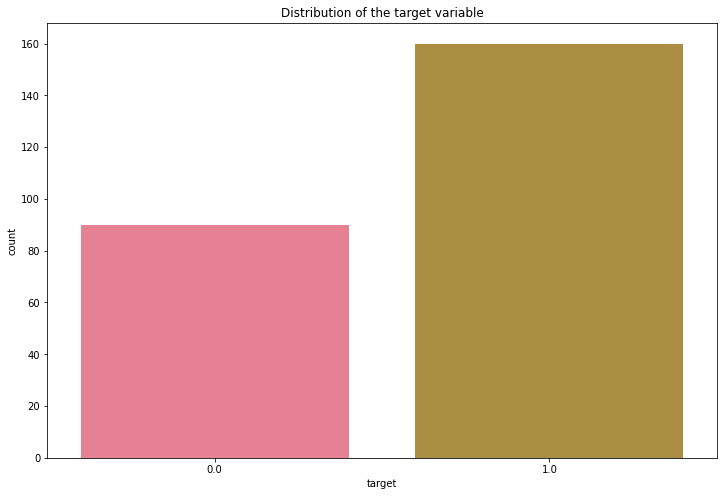

In [9]:
fig= plt.figure(figsize=(12, 8));
sns.countplot(train_df['target'])
plt.title('Distribution of the target variable');

The chart above shows that the target variable has two distinct classes that are imbalanced. Thus, this is a classification task.
This problem would involve a solid crossvalidation strategy because of the class imbalance and small samples.

##### **Numeric Variables**

In [10]:
train_df.corr()['target'].abs().sort_values(ascending=False)

target    1.000000
33        0.373608
65        0.293846
217       0.207215
117       0.197496
91        0.192536
24        0.173096
295       0.170501
73        0.167557
183       0.164146
80        0.162558
199       0.159442
189       0.155956
194       0.150384
16        0.144267
39        0.142915
165       0.142526
201       0.142238
129       0.139439
133       0.139100
258       0.138332
230       0.136263
90        0.136230
298       0.134760
220       0.134738
134       0.133731
237       0.133168
30        0.132705
150       0.130454
82        0.128248
63        0.127440
209       0.127391
289       0.127213
114       0.124792
164       0.124151
252       0.122335
43        0.121413
101       0.118379
239       0.118166
276       0.117467
4         0.114726
272       0.113909
108       0.113875
226       0.113660
17        0.110998
105       0.110589
0         0.108966
244       0.108147
13        0.107828
98        0.101702
127       0.101558
176       0.099790
89        0.

Most of the features have weak linear correlation with the target feature. 

Text(0.5, 1.0, 'Correlation of continuous features with target')

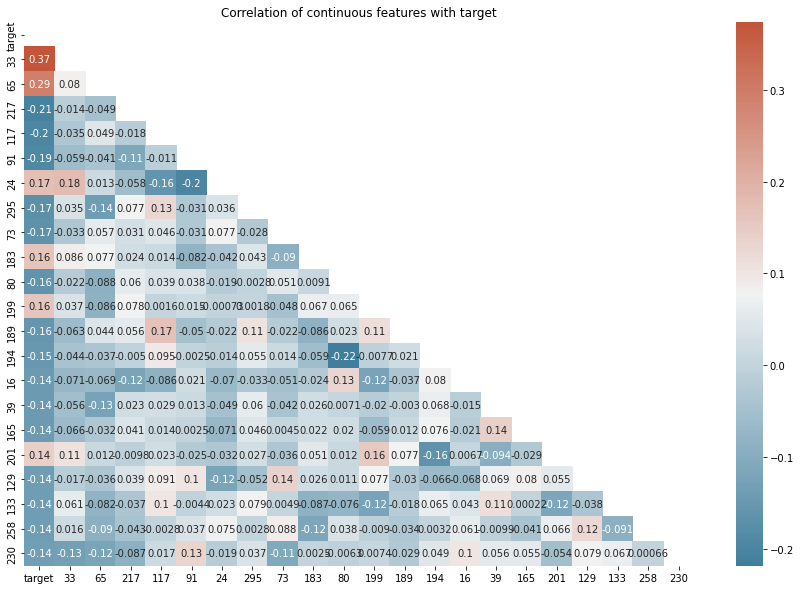

In [11]:
# Checking for multicollinearity among the first 20 features wih higher correlation coefficients
f = plt.figure(figsize=(15, 10))
num_cols = ['target', '33', '65', '217', '117', '91', '24', '295', '73', '183', '80', '199', '189', '194', '16', '39', '165', '201', '129', '133', '258','230']
corr = train_df[num_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, mask=mask, annot= True);
plt.title('Correlation of continuous features with target')

There is no collinearity among the selected features

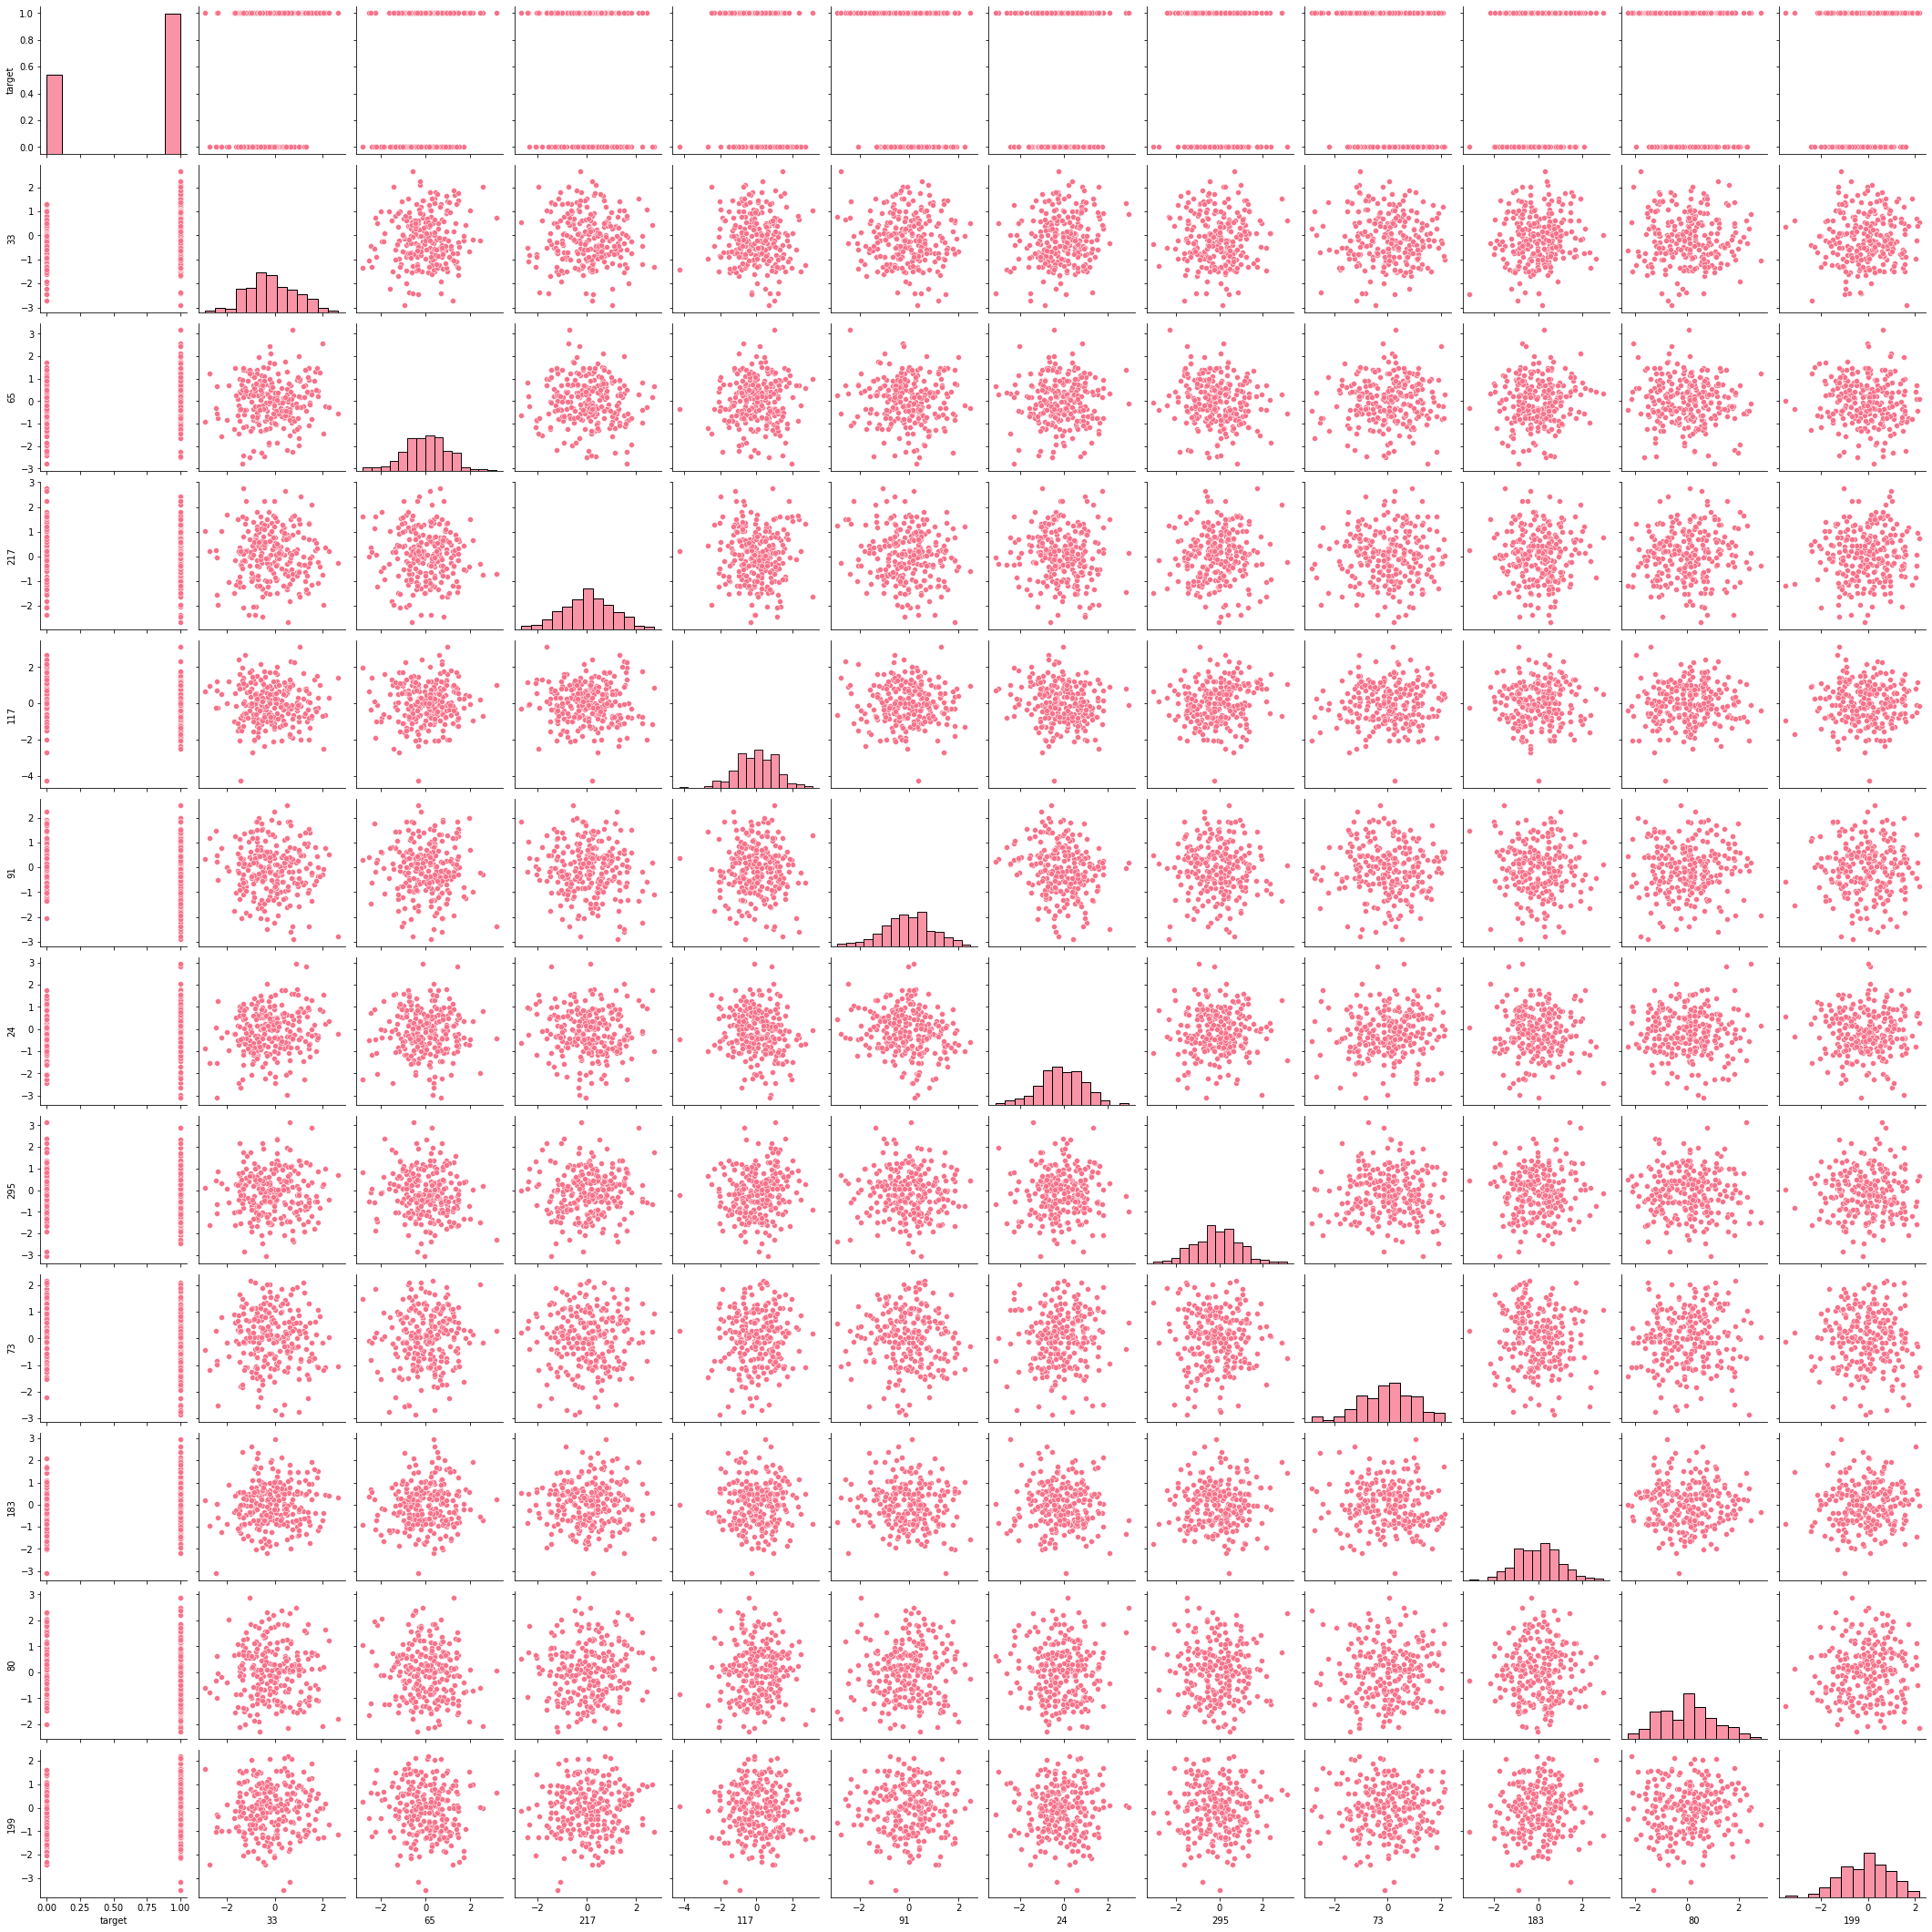

In [12]:
#Checking for the kind of relationship between features wih higher correlation coefficients and the target

num_cols = ['target', '33', '65', '217', '117', '91', '24', '295', '73', '183', '80', '199']
sns.pairplot(train_df[num_cols], height = 2.5)

<Figure size 1080x720 with 0 Axes>

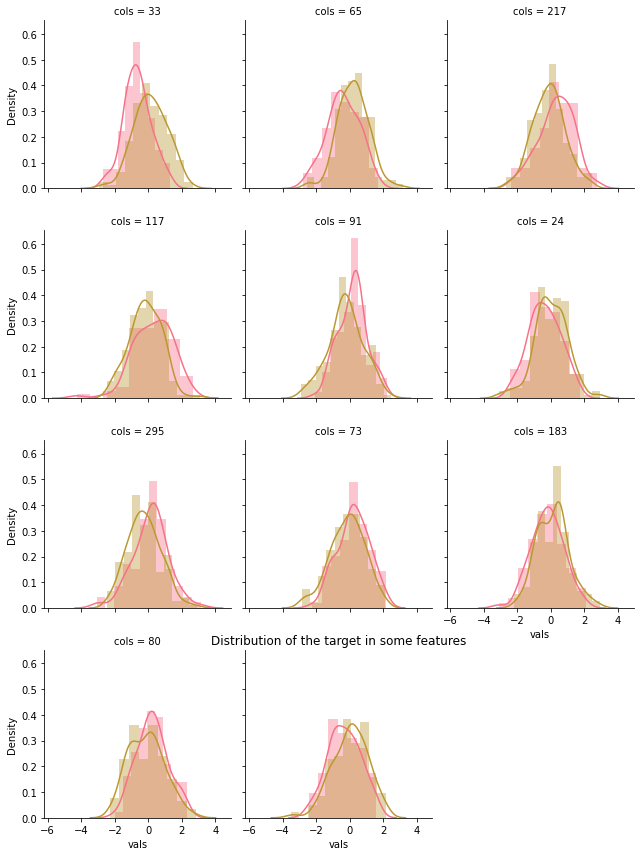

In [13]:
# Checking for skewness among the features wih higher correlation coefficients
fig = plt.figure(figsize=(15, 10))

f = train_df[num_cols].melt(['target'], var_name='cols',  value_name='vals')
g = sns.FacetGrid(f, col='cols', col_wrap=3, hue="target");
g = (g.map(sns.distplot, "vals", hist=True));
plt.title('Distribution of the target in some features');


These distributions do not appear to be skewed.

In [14]:
skewness = train_df.drop('target', axis= 1).apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
skewed_features = skewness.index
print(str(skewness.shape[0]) + " are skewed")

0 are skewed


None of the features is skewed.

Since there are no variable names as described earlier, there is a limit on the feature engineering strategies that can be conducted on the dataset. Hence, attention will be given to a good crossvalidation strategy (because of the few training examples) and hyperparameter optimization of the selected algorithm.

### **Model Building and Evaluation**

In [15]:
scaler= StandardScaler()
train_features= train_df.drop('target', axis= 1)
train_scaled_features= scaler.fit_transform(train_features)
y= train_df.target

In [16]:
models = [
          ('Logistic regression', LogisticRegression()),
          ('DecisionTreeClassifier', DecisionTreeClassifier()),
          ('Random Forest', RandomForestClassifier( )),
          ('SVM', SVC()), 
          ('LGBClassifier', LGBMClassifier()),
          ('XGBoost', XGBClassifier()),
          ('DecisionTree', DecisionTreeClassifier()),
          ('BaggingClassifier', BaggingClassifier())

        ]
from sklearn.model_selection import cross_val_score, KFold, cross_validate
dfs = []
results = []
names = []
scoring = ['f1_weighted', 'roc_auc']

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, shuffle= True, random_state= 100)
    cv_results = cross_validate(model, train_scaled_features, y, cv=kfold, scoring=scoring, return_train_score=True)
    results.append(cv_results)
    names.append(name)
    
    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)

In [17]:
result = final.groupby(['model']).agg({'test_roc_auc':'mean', 'train_roc_auc':'mean' }).reset_index()
result.sort_values(by='test_roc_auc', ascending= False)

,model,test_roc_auc,train_roc_auc
4,Logistic regression,0.744444,1.000000
6,SVM,0.737500,1.000000
7,XGBoost,0.703472,1.000000
3,LGBClassifier,0.691667,1.000000
5,Random Forest,0.650694,1.000000
2,DecisionTreeClassifier,0.604167,1.000000
0,BaggingClassifier,0.594444,0.999383
1,DecisionTree,0.577431,1.000000


Logistic regression model had the best validation AUC score. This will further optimized through hyperparameter tuning to see if it will improve the score

### **Crossvalidation with hyperparameter tuning**

### **Logistic Regression**

In [19]:
params= dict(
    solver = ['newton-cg', 'lbfgs', 'liblinear'],
    penalty = ['l1'],
    C = [100, 10, 1.0, 0.1, 0.01],
    max_iter= [100, 500, 1000, 1500, 2000, 10000]
) 


model = LogisticRegression()
RANDOM_STATE= 50

random_search_LR= RandomizedSearchCV(
    model,
    params,
    n_iter=15,
    cv=10,
    verbose=1,
    n_jobs=5,
    scoring= 'roc_auc',
    random_state= RANDOM_STATE
)


random_search_LR.fit(train_scaled_features, y)

params_LR= random_search_LR.best_params_
params_LR

Fitting 10 folds for each of 15 candidates, totalling 150 fits


{'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [20]:
X_train, X_valid, y_train, y_valid= train_test_split(train_features, y, test_size= 0.2, random_state= 20, stratify= y)

In [21]:
LR = LogisticRegression(**params_LR,  class_weight= 'balanced', random_state= 400)

pipeline_LR = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('model', LR)
    ]
)

pipeline_LR.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    penalty='l1', random_state=400,
                                    solver='liblinear'))])

In [22]:
# Train loss vs validation loss 
y_pred_train = pipeline_LR.predict_proba(X_train)[:, 1]
LR_train_score= roc_auc_score(y_train, y_pred_train)

y_pred = pipeline_LR.predict_proba(X_valid)[:, 1]
LR_val_score= roc_auc_score(y_valid, y_pred)

LR_train_score, LR_val_score

(0.9356553819444445, 0.7881944444444444)

After hyperparameter optimization, the validation score greatly improved, moving closer to the training score. There is a chance that this will be improved when the model is trained on the whole train set because of the small size, hence this step will be carried out before checking it on the leaderboard

In [23]:
LR = LogisticRegression(**params_LR,  class_weight= 'balanced', random_state= 400)

pipeline_LR_final = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('model', LR)
    ]
)

pipeline_LR_final.fit(train_features, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    penalty='l1', random_state=400,
                                    solver='liblinear'))])

In [24]:
test_preds = pipeline_LR_final.predict_proba(test_df)[:, 1]

In [25]:
file = {'id': test.iloc[:, 0], 'target': test_preds}

submission = pd.DataFrame(file, columns = ['id', 'target'])

submission.to_csv('overfit_Submission6.csv', index = False)

### **Conclusion**

Of the seven algorithms attempted, logistic regression gave the best validation AUC score, closest to the train AUC score. Upon cross_validation and hyperparameter optimization, the AUC score further improved, leading to public and private scores of 0.848 and 0.837 on Kaggle leaderboard. This met the project requirement.
